### self-supervised learning

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import torchaudio
from sklearn.model_selection import train_test_split
import os
import sys
import torch
from transformers import AutoConfig, Wav2Vec2Processor

os.chdir(r'C:\Users\777\Documents\dusha')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
%env LC_ALL=C.UTF-8
%env LANG=C.UTF-8
%env TRANSFORMERS_CACHE=/content/cache
%env HF_DATASETS_CACHE=/content/cache
%env CUDA_LAUNCH_BLOCKING=1

env: LC_ALL=C.UTF-8
env: LANG=C.UTF-8
env: TRANSFORMERS_CACHE=/content/cache
env: HF_DATASETS_CACHE=/content/cache
env: CUDA_LAUNCH_BLOCKING=1


In [3]:
df = pd.read_csv('major_train_balanced.csv')
#df = df[['audio_path', 'annotator_emo']]
df = df.sample(12000)
df_tst = pd.read_csv('major_test_dataset.csv')

In [4]:
df['audio_path'] = df['audio_path'].apply(lambda x: os.path.join(r"DATASET_PATH\wavs_train", x))

In [5]:
df

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
98854,f83fa6f8efd82bd137f6f118d8cad93d,DATASET_PATH\wavs_train\f83fa6f8efd82bd137f6f1...,5.860000,1.0,NaN,19461c9183a3e1c09e2ebd1348a561b6,дом три корпус пять квартиры нет,sad,f863a30050768ec580ff4ec7cd133563,crowd
46461,47744e57e022a0d1624279ea931c8815,DATASET_PATH\wavs_train\47744e57e022a0d1624279...,2.303625,2.0,NaN,f2073be316c82bf7c953fada1e840d4b,россо руссо,positive,9c921553e50bf9ed2a3963e8652a4085,crowd
66000,52da9a934125bff0750ee251bef7b962,DATASET_PATH\wavs_train\52da9a934125bff0750ee2...,2.840000,2.0,NaN,518df35153d335fa20fc47153c28cf80,тебя приветствует,positive,6973d283adac719bd9d25c96b24a1626,crowd
26383,acac669beff9a903c8ece83adc8f99d6,DATASET_PATH\wavs_train\acac669beff9a903c8ece8...,3.880000,0.0,NaN,e93396a36b929023a6af39feb8928728,путешествие по африке,neutral,5e69fe915a73cb44e072cbe7cbbee341,crowd
86386,4750f28245d33aefbf7f7e8815cc60a4,DATASET_PATH\wavs_train\4750f28245d33aefbf7f7e...,6.740000,1.0,NaN,2c6785eafd7323f3eaf8957ee2e9de69,переключи на ютюб,sad,b8cb87a59151601ca9084f8a07ddfad7,crowd
...,...,...,...,...,...,...,...,...,...,...
58223,1c554b51fe42a17859673d6551fa5cf6,DATASET_PATH\wavs_train\1c554b51fe42a17859673d...,6.460000,2.0,NaN,9bb392425b2bcb0035849ce6973595c9,о спасибо как это мило,positive,7a900c326daf8ac0d4d619679c5a52c0,crowd
74583,30a94fcdfe6b0a0999e5d2deb4863246,DATASET_PATH\wavs_train\30a94fcdfe6b0a0999e5d2...,4.640000,2.0,NaN,983fb0be7381610eca61fdf82014bdc8,ты че все смеешься тебе вопросы задаю,positive,9e150acec1d003b9a402a6c24933c065,crowd
13192,3007a93245f1536db3c17e9eefc788fe,DATASET_PATH\wavs_train\3007a93245f1536db3c17e...,3.960000,0.0,NaN,e7448f1cedbdf7c2d2bb79092667e4c7,лука милого да,positive,ad28333d9d2edaa57c2d39e43d5cbcfc,crowd
61846,be59ee39810209af4a1db36d4fae80a9,DATASET_PATH\wavs_train\be59ee39810209af4a1db3...,3.420000,2.0,NaN,b2ac31777c400e894f18b3e153a07eae,круто наверное,positive,81bde85fd7072a73412552e96559c49a,crowd


In [5]:
df_tst['audio_path'] = df_tst['audio_path'].apply(lambda x: os.path.join(r"DATASET_PATH\wavs_test", x))

In [6]:
df_tst

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
0,9e9961c53ca6eeb440b217e539fbf46c,DATASET_PATH\wavs_test\9e9961c53ca6eeb440b217e...,5.82,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f,crowd
1,0166f65a30354db8282682b1a280e64c,DATASET_PATH\wavs_test\0166f65a30354db8282682b...,3.70,1.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f,crowd
2,d49a6b560155831725a7bdc7d0a96099,DATASET_PATH\wavs_test\d49a6b560155831725a7bdc...,4.38,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8,crowd
3,c6852b0925797612d7b6724da8cbe7b4,DATASET_PATH\wavs_test\c6852b0925797612d7b6724...,8.58,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13,crowd
4,64a7aa17132c3e4b7be1aaed5fc88090,DATASET_PATH\wavs_test\64a7aa17132c3e4b7be1aae...,5.06,2.0,NaN,32bd471407fe168dacd5f8252f9949b7,а там и ева проснулись с утра,positive,82f97728c4767b283d249afc96d23caf,crowd
...,...,...,...,...,...,...,...,...,...,...
29029,0b5911175dd80e2d5b0f6ebe2281fcf1,DATASET_PATH\wavs_test\0b5911175dd80e2d5b0f6eb...,2.60,0.0,NaN,d7fe5fc7ecf7df35fc43859c99491cd6,NaN,NaN,0f9ed62245fdc1e36a3bf8c0f7270c41,podcast
29030,1227da4809819378be4f2aac7353c592,DATASET_PATH\wavs_test\1227da4809819378be4f2aa...,1.30,0.0,NaN,013f1749c55055e16f8acf9817598b2d,NaN,NaN,742833af70986b8ff933b1cb75cb0987,podcast
29031,b7ac0b2d52191acfa44cbcc09d071de4,DATASET_PATH\wavs_test\b7ac0b2d52191acfa44cbcc...,3.10,0.0,NaN,9fccb985c2f1910e12a1b7386180aa59,NaN,NaN,6a2370e4e8cc496c4d59408bb2a9995a,podcast
29032,7e62e88117cc0cc20bba2c7902cee97d,DATASET_PATH\wavs_test\7e62e88117cc0cc20bba2c7...,2.10,0.0,NaN,d6b5eac94428cfad71114fbccbcf4dbc,NaN,NaN,d0c7db9d0bc8dd57be358f6bf13d3f90,podcast


In [35]:
ideal = pd.read_csv('ideal_data_csv.csv')
ideal['audio_path'] = ideal['audio_path'].apply(lambda x: os.path.join(r"DATASET_PATH\wavs_test", x))

ideal

,Unnamed: 0,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
0,0,9e9961c53ca6eeb440b217e539fbf46c,DATASET_PATH\wavs_test\9e9961c53ca6eeb440b217e...,5.82,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f,crowd
1,1,0166f65a30354db8282682b1a280e64c,DATASET_PATH\wavs_test\0166f65a30354db8282682b...,3.70,1.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f,crowd
2,2,d49a6b560155831725a7bdc7d0a96099,DATASET_PATH\wavs_test\d49a6b560155831725a7bdc...,4.38,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8,crowd
3,3,c6852b0925797612d7b6724da8cbe7b4,DATASET_PATH\wavs_test\c6852b0925797612d7b6724...,8.58,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13,crowd
4,4,64a7aa17132c3e4b7be1aaed5fc88090,DATASET_PATH\wavs_test\64a7aa17132c3e4b7be1aae...,5.06,2.0,NaN,32bd471407fe168dacd5f8252f9949b7,а там и ева проснулись с утра,positive,82f97728c4767b283d249afc96d23caf,crowd
...,...,...,...,...,...,...,...,...,...,...,...
29029,12046,0b5911175dd80e2d5b0f6ebe2281fcf1,DATASET_PATH\wavs_test\0b5911175dd80e2d5b0f6eb...,2.60,0.0,NaN,d7fe5fc7ecf7df35fc43859c99491cd6,NaN,NaN,0f9ed62245fdc1e36a3bf8c0f7270c41,podcast
29030,12047,1227da4809819378be4f2aac7353c592,DATASET_PATH\wavs_test\1227da4809819378be4f2aa...,1.30,0.0,NaN,013f1749c55055e16f8acf9817598b2d,NaN,NaN,742833af70986b8ff933b1cb75cb0987,podcast
29031,12048,b7ac0b2d52191acfa44cbcc09d071de4,DATASET_PATH\wavs_test\b7ac0b2d52191acfa44cbcc...,3.10,0.0,NaN,9fccb985c2f1910e12a1b7386180aa59,NaN,NaN,6a2370e4e8cc496c4d59408bb2a9995a,podcast
29032,12049,7e62e88117cc0cc20bba2c7902cee97d,DATASET_PATH\wavs_test\7e62e88117cc0cc20bba2c7...,2.10,0.0,NaN,d6b5eac94428cfad71114fbccbcf4dbc,NaN,NaN,d0c7db9d0bc8dd57be358f6bf13d3f90,podcast


In [6]:
# Filter broken and non-existed paths

print(f"Step 0: {len(df)}")

df["status"] = df["audio_path"].apply(lambda path: True if os.path.exists(path) else None)
df = df.dropna(subset=["audio_path"])
df = df.drop("status", axis=1)
print(f"Step 1: {len(df)}")

df = df.sample(frac=1)
df = df.reset_index(drop=True)


Step 0: 12000
Step 1: 12000


In [9]:
# Filter broken and non-existed paths

print(f"Step 0: {len(df_tst)}")

df_tst["status"] = df_tst["audio_path"].apply(lambda path: True if os.path.exists(path) else None)
df_tst = df_tst.dropna(subset=["audio_path"])
df_tst = df_tst.drop("status", axis=1)
print(f"Step 1: {len(df_tst)}")

df_tst = df_tst.sample(frac=1)
df_tst = df_tst.reset_index(drop=True)

Step 0: 29034
Step 1: 29034


In [10]:
df_tst.to_csv(f"major_test_w2v.csv", sep="\t", encoding="utf-8", index=False)

In [7]:
print("Labels: ", df["annotator_emo"].unique())
print()
df.groupby("annotator_emo").count()[["audio_path"]]

Labels:  [2. 0. 3. 1.]



,audio_path
annotator_emo,
0.0,3680
1.0,3270
2.0,2720
3.0,2330


In [8]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=123, stratify=df["annotator_emo"])

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


train_df.to_csv(f"train_w2v.csv", sep="\t", encoding="utf-8", index=False)
test_df.to_csv(f"test_w2v.csv", sep="\t", encoding="utf-8", index=False)


print(train_df.shape)
print(test_df.shape)

(9000, 10)
(3000, 10)


In [36]:
train_df, test_df = train_test_split(ideal, test_size=0.99, random_state=123, stratify=ideal["annotator_emo"])

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


train_df.to_csv(f"train_w2v.csv", sep="\t", encoding="utf-8", index=False)
test_df.to_csv(f"test_w2v.csv", sep="\t", encoding="utf-8", index=False)


print(train_df.shape)
print(test_df.shape)

(290, 11)
(28744, 11)


In [15]:
df_tst

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
0,9e9961c53ca6eeb440b217e539fbf46c,9e9961c53ca6eeb440b217e539fbf46c.wav,5.82,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f,crowd
1,0166f65a30354db8282682b1a280e64c,0166f65a30354db8282682b1a280e64c.wav,3.70,1.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f,crowd
2,d49a6b560155831725a7bdc7d0a96099,d49a6b560155831725a7bdc7d0a96099.wav,4.38,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8,crowd
3,c6852b0925797612d7b6724da8cbe7b4,c6852b0925797612d7b6724da8cbe7b4.wav,8.58,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13,crowd
4,64a7aa17132c3e4b7be1aaed5fc88090,64a7aa17132c3e4b7be1aaed5fc88090.wav,5.06,2.0,NaN,32bd471407fe168dacd5f8252f9949b7,а там и ева проснулись с утра,positive,82f97728c4767b283d249afc96d23caf,crowd
...,...,...,...,...,...,...,...,...,...,...
29029,0b5911175dd80e2d5b0f6ebe2281fcf1,0b5911175dd80e2d5b0f6ebe2281fcf1.wav,2.60,0.0,NaN,d7fe5fc7ecf7df35fc43859c99491cd6,NaN,NaN,0f9ed62245fdc1e36a3bf8c0f7270c41,podcast
29030,1227da4809819378be4f2aac7353c592,1227da4809819378be4f2aac7353c592.wav,1.30,0.0,NaN,013f1749c55055e16f8acf9817598b2d,NaN,NaN,742833af70986b8ff933b1cb75cb0987,podcast
29031,b7ac0b2d52191acfa44cbcc09d071de4,b7ac0b2d52191acfa44cbcc09d071de4.wav,3.10,0.0,NaN,9fccb985c2f1910e12a1b7386180aa59,NaN,NaN,6a2370e4e8cc496c4d59408bb2a9995a,podcast
29032,7e62e88117cc0cc20bba2c7902cee97d,7e62e88117cc0cc20bba2c7902cee97d.wav,2.10,0.0,NaN,d6b5eac94428cfad71114fbccbcf4dbc,NaN,NaN,d0c7db9d0bc8dd57be358f6bf13d3f90,podcast


In [16]:
test_df

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
0,3bc16870a8cdfc86d11c3f15612230b6,DATASET_PATH\wavs_train\3bc16870a8cdfc86d11c3f...,9.480000,1.0,NaN,839f4ee24ec50bc509788cd0fdaa24ae,света и богдан новые серии интересные,sad,749bd4cad1ddbc7211b23a68e5f9f12a,crowd
1,2c3c8627669699ec379cdc6b79d6272e,DATASET_PATH\wavs_train\2c3c8627669699ec379cdc...,3.700125,2.0,NaN,3c4a72578b21012d8be679d2ac7857b4,NaN,NaN,f950427a9a484c6b5f91a00d3e1e1d2a,podcast
2,714fd6615c6ac2ea41bbd58a89b24c20,DATASET_PATH\wavs_train\714fd6615c6ac2ea41bbd5...,2.600000,3.0,NaN,6a059476b07f0467b9474fc47537784e,NaN,NaN,d050ba86db860862bc883a52c730a4d6,podcast
3,0fe49d4f0d472278f53da3961f80ec59,DATASET_PATH\wavs_train\0fe49d4f0d472278f53da3...,4.220000,0.0,NaN,4935c7226531329a7287e19105c46471,лечение геморроя в домашних условиях,neutral,8037ac354caf19919834a3e7fab4c165,crowd
4,e0b71a79433c1bc5faf97c64e0034f14,DATASET_PATH\wavs_train\e0b71a79433c1bc5faf97c...,2.300000,0.0,NaN,6b6874499b481fd50ddec1ddef9be70e,NaN,NaN,0c34b4599da4dd5b3ee762ec9cc05baa,podcast
...,...,...,...,...,...,...,...,...,...,...
2995,5d3d6cb57689f94650c45001a1372949,DATASET_PATH\wavs_train\5d3d6cb57689f94650c450...,7.128125,1.0,NaN,98d747541c9ad7482c0106bcd14854a5,ой а я че то тебя обидела,sad,ab235f7d60eff8cf435ee50eb9960d53,crowd
2996,4aafbbfa4ace1762e258ede802cb94cb,DATASET_PATH\wavs_train\4aafbbfa4ace1762e258ed...,5.220000,2.0,NaN,55df3582f6b8ece0700ea1c8e82d0821,давай перейдем хорошо,neutral,95d4a32b7c3c1705aa3d959c0de82d5b,crowd
2997,65a35d26733cad76f979e4595778d4b8,DATASET_PATH\wavs_train\65a35d26733cad76f979e4...,5.220000,1.0,NaN,d2118e93c98828943c6bdad27c42f777,ты такая грустная,sad,d6343b21b2e2df03f628ed6a3e9464a5,crowd
2998,f9f682845786bf31877b97890e8ba8e6,DATASET_PATH\wavs_train\f9f682845786bf31877b97...,5.180000,2.0,NaN,d0d085e6bf858a7d83885dc85f2352aa,музыка зацепила меня,neutral,8ec725677a375a3e5b05ca89a61baf76,crowd


In [37]:
from datasets import load_dataset, load_metric


data_files = {
    "train": "train_w2v.csv",
    "validation": "test_w2v.csv",
    #"test": "major_test_w2v.csv",
}

dataset = load_dataset("csv", data_files=data_files, delimiter="\t", )
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]
#test_dataset = dataset["test"]

print(train_dataset)
print(eval_dataset)
#print(test_dataset)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['Unnamed: 0', 'hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset'],
    num_rows: 290
})
Dataset({
    features: ['Unnamed: 0', 'hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset'],
    num_rows: 28744
})


In [18]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(
    'bond005/wav2vec2-large-ru-golos', return_attention_mask=True
)

def get_array_from_wav(path):
    target_sampling_rate=16000
    speech_array, sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(sampling_rate, target_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech


def preprocess_function(examples):
    audio_arrays = [get_array_from_wav(x) for x in examples["audio_path"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=96000,
        truncation=True,
        padding=True,
    )
    return inputs


# This line with pre-process our speech_commands_v1 dataset. We also remove the "audio"
# and "file" columns as they will be of no use to us while training.
processed_train = train_dataset.map(
    preprocess_function, remove_columns=["audio_path"], batched=True
)
processed_eval = eval_dataset.map(
    preprocess_function, remove_columns=["audio_path"], batched=True
)

# Load the whole dataset splits as a dict of numpy arrays


Map:   0%|          | 0/9000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

## LSTM Wav2Vec

In [27]:
from torch import nn


class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1),
            nn.MaxPool1d(kernel_size=2),
        )
    def forward(self, x):
        x = x.reshape(x.size(0), 1, -1)
        x = self.conv_layers(x)
        x = x.reshape(x.size(0), -1)
        return x

model_cnn = CNNNetwork()
model_cnn = model_cnn.to(device)



In [28]:
from torchsummary import summary

summary(model_cnn, (128, 1, 96000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1          [-1, 1, 12288000]               4
         MaxPool1d-2           [-1, 1, 6144000]               0
            Conv1d-3           [-1, 1, 6144000]               4
         MaxPool1d-4           [-1, 1, 3072000]               0
            Conv1d-5           [-1, 1, 3072000]               4
         MaxPool1d-6           [-1, 1, 1536000]               0
            Conv1d-7           [-1, 1, 1536000]               4
         MaxPool1d-8            [-1, 1, 768000]               0
            Conv1d-9            [-1, 1, 768000]               4
        MaxPool1d-10            [-1, 1, 384000]               0
           Conv1d-11            [-1, 1, 384000]               4
        MaxPool1d-12            [-1, 1, 192000]               0
           Conv1d-13            [-1, 1, 192000]               4
        MaxPool1d-14             [-1, 1

In [29]:
class VariableHiddenDimBiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(VariableHiddenDimBiLSTM, self).__init__()
        self.num_layers = len(hidden_dims)
        self.lstm_layers = nn.ModuleList()

        self.lstm_layers.append(nn.LSTM(input_dim, hidden_dims[0], bidirectional=True))

        for i in range(1, self.num_layers):
            self.lstm_layers.append(nn.LSTM(hidden_dims[i-1]*2, hidden_dims[i], bidirectional=True))

        self.fc1 = nn.Linear(hidden_dims[-1]*2, 128)  # Добавляем новый полносвязный слой
        self.fc2 = nn.Linear(128, output_dim)  # Изменяем выходной слой на 4 нейрона
        self.hidden_dims = hidden_dims

    def init_hidden(self, bs):
        hidden = []
        for i in range(self.num_layers):
            hidden.append((torch.zeros(2, bs, self.hidden_dims[i]), torch.zeros(2, bs, self.hidden_dims[i])))
        return hidden


    def forward(self, X, hidden):
        out = X.unsqueeze(0)
        for i in range(self.num_layers):
            out, hidden[i] = self.lstm_layers[i](out, hidden[i])
            #out = self.dropout_layers[i](out)  # Применение Dropout
        out = out.squeeze(0)
        out = torch.relu(self.fc1(out))
        out = torch.log_softmax(self.fc2(out), dim=1)  # Применяем log_softmax к выходному слою
        return out, hidden



model = VariableHiddenDimBiLSTM(input_dim=750, hidden_dims=[512, 256], output_dim=4)


model.to(device)


VariableHiddenDimBiLSTM(
  (lstm_layers): ModuleList(
    (0): LSTM(750, 512, bidirectional=True)
    (1): LSTM(1024, 256, bidirectional=True)
  )
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [30]:
from torch.utils.data import DataLoader


def collate_fn(batch):
    text = [item['input_values'] for item in batch]
    labels = [item['annotator_emo'] for item in batch]
    text_tensor = torch.tensor(text)
    labels_tensor = torch.tensor(labels)
    return {'input_values': text_tensor, 'annotator_emo': labels_tensor}

# Создание DataLoader с преобразованием данных
batch_size = 64
dataloader_train = DataLoader(processed_train, batch_size=batch_size, collate_fn=collate_fn)
dataloader_test = DataLoader(processed_eval, batch_size=batch_size, collate_fn=collate_fn)
# Перемещение данных на устройство
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for batch in dataloader_train:
    input_data = batch['input_values'].to(device)
    labels = batch['annotator_emo'].to(device)
    print('Input data:', input_data)
    print('Labels:', labels)
    break

Input data: tensor([[ 1.4636e-01, -4.8841e-02,  4.8759e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-8.0769e-02, -8.0769e-02, -8.0769e-02,  ..., -2.6410e-01,
         -2.6410e-01, -2.8129e-01],
        [ 1.0607e-04,  1.0607e-04,  1.0607e-04,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-3.4421e-07, -3.4421e-07, -3.4421e-07,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.6974e-06,  2.6974e-06,  2.6974e-06,  ...,  8.7070e-03,
         -8.7016e-03,  2.1788e-03],
        [-1.2377e-02, -1.8623e-02, -9.7737e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]], device='cuda:0')
Labels: tensor([3., 0., 3., 2., 2., 0., 1., 2., 3., 2., 1., 0., 3., 3., 1., 0., 1., 2.,
        3., 0., 1., 2., 1., 0., 2., 0., 2., 3., 1., 0., 0., 2., 0., 3., 1., 2.,
        2., 0., 0., 2., 3., 2., 3., 1., 1., 3., 0., 2., 2., 1., 1., 3., 2., 1.,
        0., 1., 0., 2., 2., 3., 0., 0., 1., 2.], device='cuda:0')


In [31]:
for batch in dataloader_train:
    input_data = batch['input_values'].to(device)
    labels = batch['annotator_emo'].to(device)
    print('Input data:', input_data.shape)
    print('Labels:', labels)
    break

Input data: torch.Size([64, 96000])
Labels: tensor([3., 0., 3., 2., 2., 0., 1., 2., 3., 2., 1., 0., 3., 3., 1., 0., 1., 2.,
        3., 0., 1., 2., 1., 0., 2., 0., 2., 3., 1., 0., 0., 2., 0., 3., 1., 2.,
        2., 0., 0., 2., 3., 2., 3., 1., 1., 3., 0., 2., 2., 1., 1., 3., 2., 1.,
        0., 1., 0., 2., 2., 3., 0., 0., 1., 2.], device='cuda:0')


In [35]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [33]:
from sklearn.metrics import f1_score
from tqdm import tqdm
def accuracy(y_pred, y_acc):
    with torch.no_grad():
        return torch.sum(torch.max(torch.exp(y_pred), dim=1)[1] == y_acc).item() / len(y_acc)
def f1_f(y_pred, y_true):
    with torch.no_grad():
        y_pred = torch.max(torch.exp(y_pred), dim=1)[1].cpu().numpy()
        y_true = y_true.cpu().numpy()
        return f1_score(y_true, y_pred, average='weighted')

In [36]:
epochs = 2
trf1 = []
tsf1 =[]
tsa=[]
tra=[]
trls = []
tsls = []
for e in range(1, epochs + 1):
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    model.train()
    for batch in tqdm(dataloader_train, leave=True):
        x = batch['input_values'].to(device)
        y = batch['annotator_emo'].to(device)
        x = model_cnn(x)

        # Initialize the hidden state for each layer
        hidden = model.init_hidden(x.size(0))
        for i in range(len(hidden)):
            hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))
        # Forward pass and backprop
        out, hidden = model(x, hidden)
        loss = loss_function(out, y.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(out, y)
        train_f1 += f1_f(out, y)

    # Scale accuracy and losses
    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)
    train_f1 /= len(dataloader_train)

    test_loss = 0
    test_acc = 0
    test_f1 = 0

    with torch.no_grad():
        for batch in tqdm(dataloader_test, leave=True):
            x = batch['input_values'].to(device)
            y = batch['annotator_emo'].to(device)
            x = model_cnn(x)
            hidden = model.init_hidden(x.size(0))
            for i in range(len(hidden)):
                hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

            out, hidden = model(x, hidden)
            loss = loss_function(out, y.long())

            test_loss += loss.item()
            test_acc += accuracy(out, y)
            test_f1 += f1_f(out, y)

    test_loss /= len(dataloader_test)
    test_acc /= len(dataloader_test)
    test_f1 /= len(dataloader_test)
    trf1.append(train_f1)
    tsf1.append(test_f1)
    tsa.append(test_acc)
    tra.append(train_acc)
    trls.append(train_loss)
    tsls.append(test_loss)

    print("Epoch {:4} | Train Loss {:.4f} | Train Acc {:.4f} | Train F1 {:.4f} | Test Loss {:.4f} | Test Acc {:.4f} | Test F1 {:.4f}".format(e+2, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))


torch.save(model.state_dict(), 'wavvecBILSTM_cnn.path')

100%|██████████| 19/19 [01:00<00:00,  3.16s/it]


Epoch    3 | Train Loss 1.3745 | Train Acc 0.3038 | Train F1 0.1452 | Test Loss 1.3739 | Test Acc 0.3035 | Test F1 0.1436


100%|██████████| 19/19 [00:58<00:00,  3.10s/it]

Epoch    4 | Train Loss 1.3741 | Train Acc 0.3038 | Train F1 0.1452 | Test Loss 1.3738 | Test Acc 0.3035 | Test F1 0.1436


## THE END OF LSTM WAV2VEC

In [38]:
input_column = "audio_path"
output_column = "annotator_emo"

In [39]:
label_list = train_dataset.unique(output_column)
label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)
print(f"A classification problem with {num_labels} classes: {label_list}")

A classification problem with 4 classes: [0.0, 1.0, 2.0, 3.0]


In [12]:
model_name_or_path = "jonatasgrosman/wav2vec2-large-xlsr-53-russian"
#model_name_or_path = "jonatasgrosman/wav2vec2-large-xlsr-53-russian"
pooling_mode = "mean"

In [13]:
# config
config = AutoConfig.from_pretrained(
    model_name_or_path,
    num_labels=num_labels,
    label2id={label: i for i, label in enumerate(label_list)},
    id2label={i: label for i, label in enumerate(label_list)},
    finetuning_task="wav2vec2_clf",
)
setattr(config, 'pooling_mode', pooling_mode)

config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

C:\Users\777\Documents\dusha\venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\777\.cache\huggingface\hub\models--jonatasgrosman--wav2vec2-large-xlsr-53-russian. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [14]:
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path,)
target_sampling_rate = processor.feature_extractor.sampling_rate
print(f"The target sampling rate: {target_sampling_rate}")

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

The target sampling rate: 16000


In [16]:
def speech_file_to_array_fn(path):
    speech_array, sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(sampling_rate, target_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech

def label_to_id(label, label_list):

    if len(label_list) > 0:
        return label_list.index(label) if label in label_list else -1

    return label

def preprocess_function(examples):
    speech_list = [speech_file_to_array_fn(path) for path in examples[input_column]]
    target_list = [label_to_id(label, label_list) for label in examples[output_column]]

    result = processor(speech_list, sampling_rate=target_sampling_rate)
    result["labels"] = list(target_list)

    return result

In [40]:
train_dataset = train_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=1
)
eval_dataset = eval_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=1
)
"""test_dataset = test_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=1)"""

Map:   0%|          | 0/290 [00:00<?, ? examples/s]

Map:   0%|          | 0/28744 [00:00<?, ? examples/s]

'test_dataset = test_dataset.map(\n    preprocess_function,\n    batch_size=100,\n    batched=True,\n    num_proc=1)'

In [20]:
train_dataset

Dataset({
    features: ['hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset', 'input_values', 'labels'],
    num_rows: 9000
})

In [21]:
eval_dataset

Dataset({
    features: ['hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset', 'input_values', 'labels'],
    num_rows: 3000
})

# 1d cnn

In [ ]:

class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv1d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 32, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.8),
            nn.Conv1d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(128, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(128, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.7),
            nn.Conv1d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(256, 256, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.7),
            nn.Conv1d(256, 512, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.6),
            nn.Flatten(),
            nn.Linear(512 * 1 * 94, 1000),
            nn.LeakyReLU(),
            nn.Linear(1000, 4),
        )

    def forward(self, x):
        x = self.conv_stack(x)
        return x

In [ ]:
from torchsummary import summary
model_cnn = CNNNetwork()
model_cnn = model_cnn.to(device)
summary(model_cnn, (1, 128, 512))

In [ ]:
model = CNNNetwork()
epochs = 4
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm
def accuracy(y_pred, y_acc):
    with torch.no_grad():
        return torch.sum(torch.max(torch.exp(y_pred), dim=1)[1] == y_acc).item() / len(y_acc)
def f1_f(y_pred, y_true):
    with torch.no_grad():
        y_pred = torch.max(torch.exp(y_pred), dim=1)[1].cpu().numpy()
        y_true = y_true.cpu().numpy()
        return f1_score(y_true, y_pred, average='weighted')

In [ ]:
trf1 = []
tsf1 = []
tsa = []
tra = []
trls = []
tsls = []
model = model_cnn

In [ ]:
epochs = 12
for e in range(1, epochs + 1):
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    model.train()
    for batch in tqdm(dataloader_train, leave=True):
        x, y, dataset = batch
        x, y = x.cuda(), y.cuda()
        # Forward pass and backprop
        out= model_cnn(x)
        loss = loss_function(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(out, y)
        train_f1 += f1_f(out, y)

    print(loss.item(), 'train loss item')
    # Scale accuracy and losses
    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)
    train_f1 /= len(dataloader_train)

    test_loss = 0
    test_acc = 0
    test_f1 = 0

    with torch.no_grad():
        for batch in tqdm(dataloader_test, leave=True):
            x, y, dataset = batch
            x, y = x.cuda(), y.cuda()
            out = model_cnn(x)
            loss = loss_function(out, y)
            test_loss += loss.item()
            test_acc += accuracy(out, y)
            test_f1 += f1_f(out, y)

        print(loss.item(), 'test loss item')

    test_loss /= len(dataloader_test)
    test_acc /= len(dataloader_test)
    test_f1 /= len(dataloader_test)
    trf1.append(train_f1)
    tsf1.append(test_f1)
    tsa.append(test_acc)
    tra.append(train_acc)
    trls.append(train_loss)
    tsls.append(test_loss)

    print(
        "Epoch {:4} | Train Loss {:.4f} | Train Acc {:.4f} | Train F1 {:.4f} | Test Loss {:.4f} | Test Acc {:.4f} | Test F1 {:.4f}".format(
            e+12, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))

    torch.save(model.state_dict(), f'Deeper_CNNMels_deep_balanced_epoch_{e+12}.pth')

In [18]:
idx = 0
print(f"Training input_values: {train_dataset[idx]['input_values']}")
#print(f"Training attention_mask: {train_dataset[idx]['attention_mask']}")
print(f"Training labels: {train_dataset[idx]['labels']} - {train_dataset[idx]['annotator_emo']}")

Training input_values: [0.017250625416636467, 0.028681587427854538, 0.01785225421190262, 0.021462032571434975, 0.025673439726233482, 0.022063661366701126, 0.02386855147778988, 0.021462032571434975, 0.026275068521499634, 0.03890928998589516, 0.049136992543935776, 0.053950030356645584, 0.07019402831792831, 0.0671858862042427, 0.06899077445268631, 0.0671858862042427, 0.055153291672468185, 0.05755981057882309, 0.04011255130171776, 0.043120697140693665, 0.03890928998589516, 0.025673439726233482, 0.037706032395362854, 0.03529951348900795, 0.027478327974677086, 0.03168973699212074, 0.028681587427854538, 0.03168973699212074, 0.014844106510281563, 0.005218031816184521, 0.019657142460346222, 0.016047365963459015, 0.010632699355483055, 0.014242476783692837, 0.01364084705710411, -0.00019663457351271063, 0.007624550256878138, 0.014844106510281563, 0.009429438970983028, 0.006421291269361973, -0.0038064122200012207, 0.004014772828668356, 0.016648994758725166, 0.004014772828668356, -0.0026031529996544

In [19]:
from dataclasses import dataclass
from typing import Optional, Tuple
import torch
from transformers.file_utils import ModelOutput


@dataclass
class SpeechClassifierOutput(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None

In [20]:
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss

from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2PreTrainedModel,
    Wav2Vec2Model
)


class Wav2Vec2ClassificationHead(nn.Module):
    """Head for wav2vec classification task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x


class Wav2Vec2ForSpeechClassification(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.pooling_mode = config.pooling_mode
        self.config = config

        self.wav2vec2 = Wav2Vec2Model(config)
        self.classifier = Wav2Vec2ClassificationHead(config)

        self.init_weights()

    def freeze_feature_extractor(self):
        self.wav2vec2.feature_extractor._freeze_parameters()

    def merged_strategy(
            self,
            hidden_states,
            mode="mean"
    ):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")

        return outputs

    def forward(
            self,
            input_values,
            attention_mask=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            labels=None,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_states = outputs[0]
        hidden_states = self.merged_strategy(hidden_states, mode=self.pooling_mode)
        logits = self.classifier(hidden_states)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SpeechClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [21]:
from dataclasses import dataclass
from typing import Dict, List, Optional, Union
import torch

import transformers
from transformers import Wav2Vec2Processor


@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [feature["labels"] for feature in features]

        d_type = torch.long if isinstance(label_features[0], int) else torch.float

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        batch["labels"] = torch.tensor(label_features, dtype=d_type)

        return batch

In [22]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

In [23]:
is_regression = False

In [24]:
import numpy as np
from transformers import EvalPrediction


def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = np.squeeze(preds) if is_regression else np.argmax(preds, axis=1)

    if is_regression:
        return {"mse": ((preds - p.label_ids) ** 2).mean().item()}
    else:
        return {"accuracy": (preds == p.label_ids).astype(np.float32).mean().item()}

In [25]:
model = Wav2Vec2ForSpeechClassification.from_pretrained(
    model_name_or_path,
    config=config)

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSpeechClassification were not initialized from the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-russian and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
model.freeze_feature_extractor()

In [27]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/shto",
    # output_dir="/content/gdrive/MyDrive/wav2vec2-xlsr-greek-speech-emotion-recognition"
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    evaluation_strategy="steps",
    num_train_epochs=1.0,
    fp16=True,
    save_steps=10,
    eval_steps=10,
    logging_steps=10,
    learning_rate=1e-4,
    save_total_limit=2,
)

In [28]:
from typing import Any, Dict, Union

import torch
from packaging import version
from torch import nn

from transformers import (
    Trainer,
    is_apex_available,
)

if is_apex_available():
    from apex import amp

if version.parse(torch.__version__) >= version.parse("1.6"):
    _is_native_amp_available = True
    from torch.cuda.amp import autocast


class CTCTrainer(Trainer):
    def training_step(self, model: nn.Module, inputs: Dict[str, Union[torch.Tensor, Any]]) -> torch.Tensor:
        """
        Perform a training step on a batch of inputs.

        Subclass and override to inject custom behavior.

        Args:
            model (:obj:`nn.Module`):
                The model to train.
            inputs (:obj:`Dict[str, Union[torch.Tensor, Any]]`):
                The inputs and targets of the model.

                The dictionary will be unpacked before being fed to the model. Most models expect the targets under the
                argument :obj:`labels`. Check your model's documentation for all accepted arguments.

        Return:
            :obj:`torch.Tensor`: The tensor with training loss on this batch.
        """

        model.train()
        inputs = self._prepare_inputs(inputs)

        if self.use_amp:
            with autocast():
                loss = self.compute_loss(model, inputs)
        else:
            loss = self.compute_loss(model, inputs)

        if self.args.gradient_accumulation_steps > 1:
            loss = loss / self.args.gradient_accumulation_steps

        if self.use_amp:
            self.scaler.scale(loss).backward()
        elif self.use_apex:
            with amp.scale_loss(loss, self.optimizer) as scaled_loss:
                scaled_loss.backward()
        elif self.deepspeed:
            self.deepspeed.backward(loss)
        else:
            loss.backward()

        return loss.detach()

In [29]:
trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor.feature_extractor,
)

In [37]:
train_dataset

Dataset({
    features: ['hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset', 'input_values', 'labels'],
    num_rows: 9000
})

In [38]:
eval_dataset

Dataset({
    features: ['hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset', 'input_values', 'labels'],
    num_rows: 3000
})

In [30]:
trainer.train()

Step,Training Loss,Validation Loss


KeyboardInterrupt: 

In [55]:
predictions = trainer.predict(eval_dataset)

In [56]:
predictions

PredictionOutput(predictions=array([[ 1.6074219 ,  1.0761719 ,  1.1738281 , ..., -3.5234375 ,
        -4.078125  , -3.7441406 ],
       [ 4.03125   ,  0.28515625,  1.9960938 , ..., -3.7089844 ,
        -4.7929688 , -4.1601562 ],
       [ 3.2753906 ,  4.828125  ,  0.4333496 , ..., -4.140625  ,
        -4.2890625 , -2.1152344 ],
       ...,
       [ 2.4296875 , -1.4326172 ,  4.0859375 , ..., -3.3886719 ,
        -3.0488281 , -4.0117188 ],
       [ 1.3876953 , -1.2802734 ,  3.9980469 , ..., -3.3046875 ,
        -4.4023438 , -4.75      ],
       [ 1.9482422 ,  4.5859375 ,  2.0117188 , ..., -3.8378906 ,
        -5.0664062 , -3.125     ]], dtype=float32), label_ids=array([3, 2, 1, ..., 3, 3, 2], dtype=int64), metrics={'test_loss': 0.7299594283103943, 'test_accuracy': 0.7258333563804626, 'test_runtime': 89.7371, 'test_samples_per_second': 13.372, 'test_steps_per_second': 3.343})

In [34]:
# xlr russian wav2vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import Trainer

# Создайте eval_dataset, если у вас его еще нет

# trainer - ваш обученный объект transformers.Trainer
predictions = trainer.predict(eval_dataset)

# Извлекаем предсказанные метки классов
predicted_labels = predictions.predictions.argmax(axis=1)
# Если ваша модель возвращает вероятности классов, то можно использовать:
# predicted_probs = predictions.predictions

# Извлекаем фактические метки классов из eval_dataset
true_labels = eval_dataset["annotator_emo"]

# Вычисляем метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7566666666666667
Precision: 0.7618440163125507
Recall: 0.7566666666666667
F1 Score: 0.7558573682658487


In [41]:
#facebook
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import Trainer

# Создайте eval_dataset, если у вас его еще нет

# trainer - ваш обученный объект transformers.Trainer
predictions = trainer.predict(eval_dataset)

# Извлекаем предсказанные метки классов
predicted_labels = predictions.predictions.argmax(axis=1)
# Если ваша модель возвращает вероятности классов, то можно использовать:
# predicted_probs = predictions.predictions

# Извлекаем фактические метки классов из eval_dataset
true_labels = eval_dataset["annotator_emo"]

# Вычисляем метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7300306150848873
Precision: 0.8022488670005188
Recall: 0.7300306150848873
F1 Score: 0.7483439484714851


In [42]:
# xlr russian wav2vec test data
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,))

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81     20833
         1.0       0.42      0.85      0.56      3264
         2.0       0.52      0.63      0.57      2478
         3.0       0.60      0.72      0.66      2169

    accuracy                           0.73     28744
   macro avg       0.61      0.73      0.65     28744
weighted avg       0.80      0.73      0.75     28744



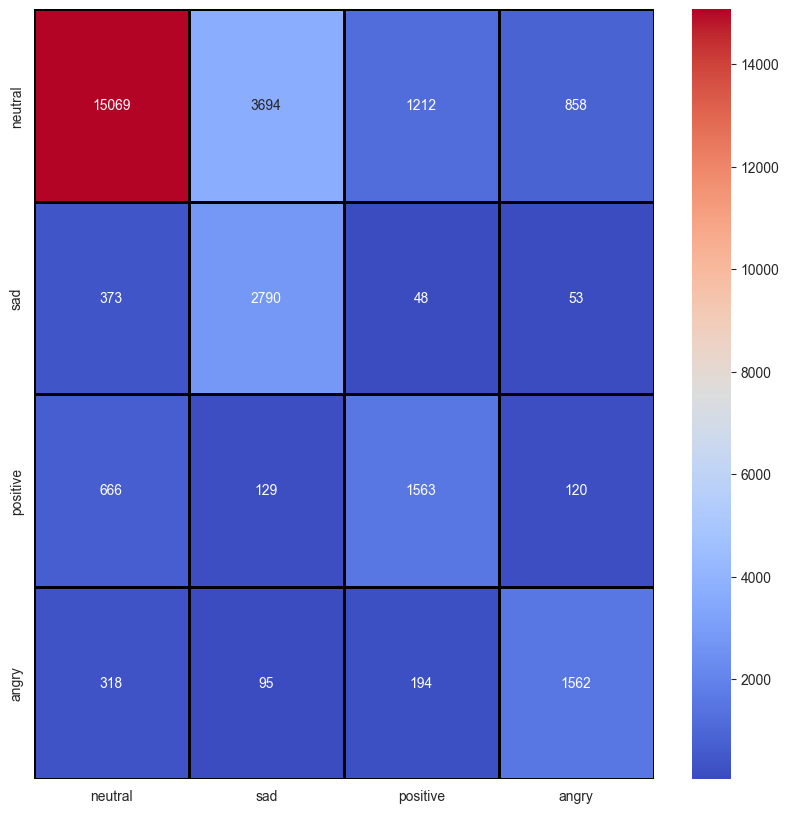

In [44]:
# xlr russian wav2vec test data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, cmap='coolwarm', linewidths=2, linecolor='black',fmt=str(), xticklabels={'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3}, yticklabels={'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import Trainer

# Создайте eval_dataset, если у вас его еще нет

# trainer - ваш обученный объект transformers.Trainer
predictions = trainer.predict(eval_dataset)

# Извлекаем предсказанные метки классов
predicted_labels = predictions.predictions.argmax(axis=1)
# Если ваша модель возвращает вероятности классов, то можно использовать:
# predicted_probs = predictions.predictions

# Извлекаем фактические метки классов из eval_dataset
true_labels = eval_dataset["annotator_emo"]

# Вычисляем метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [32]:
#xlr russian
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,))

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.71       920
         1.0       0.74      0.87      0.80       818
         2.0       0.80      0.67      0.73       680
         3.0       0.85      0.75      0.80       582

    accuracy                           0.76      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.76      0.76      0.76      3000



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,))

In [ ]:
trainer.model.save_pretrained("moe_poluchilos")

In [33]:
torch.save(model.state_dict(), "moe_poluchilos/model.safetensors")

In [34]:
trainer.model = model

In [35]:
#facebook
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import Trainer

# Создайте eval_dataset, если у вас его еще нет

# trainer - ваш обученный объект transformers.Trainer
predictions = trainer.predict(eval_dataset)

# Извлекаем предсказанные метки классов
predicted_labels = predictions.predictions.argmax(axis=1)
# Если ваша модель возвращает вероятности классов, то можно использовать:
# predicted_probs = predictions.predictions

# Извлекаем фактические метки классов из eval_dataset
true_labels = eval_dataset["labels"]

# Вычисляем метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7358333333333333
Precision: 0.7411527665344806
Recall: 0.7358333333333333
F1 Score: 0.7370727600708716


In [36]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       740
           1       0.78      0.73      0.75       634
           2       0.72      0.74      0.73       545
           3       0.82      0.74      0.78       481

    accuracy                           0.74      2400
   macro avg       0.75      0.74      0.74      2400
weighted avg       0.74      0.74      0.74      2400



In [37]:
trainer.model.save_pretrained("moe_poluchilos_hz_ves_den_stradal")

# eval

In [38]:
test_dataset = load_dataset("csv", data_files={"test": "major_test_dataset.csv"}, delimiter="\t")["test"]
test_dataset

Dataset({
    features: ['hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset'],
    num_rows: 29034
})

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [17]:
model_name_or_path = "moe_poluchilos_hz_ves_den_stradal"
config = AutoConfig.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)

C:\Users\777\Documents\dusha\venv\Lib\site-packages\transformers\models\wav2vec2\processing_wav2vec2.py:54: FutureWarning: Loading a tokenizer inside Wav2Vec2Processor from a config that does not include a `tokenizer_class` attribute is deprecated and will be removed in v5. Please add `'tokenizer_class': 'Wav2Vec2CTCTokenizer'` attribute to either your `config.json` or `tokenizer_config.json` file to suppress this warning: 
  warnings.warn(


OSError: moe_poluchilos_hz_ves_den_stradal does not appear to have a file named preprocessor_config.json. Checkout 'https://huggingface.co/moe_poluchilos_hz_ves_den_stradal/tree/main' for available files.

In [45]:
def speech_file_to_array_fn(batch):
    #speech_array, sampling_rate = torchaudio.load(batch["audio_path"])
    #speech_array = speech_array.squeeze().numpy()
    #speech_array = (np.asarray(speech_array), sampling_rate, processor.feature_extractor.sampling_rate)
    speech_array, sampling_rate = torchaudio.load(batch["audio_path"])
    resampler = torchaudio.transforms.Resample(sampling_rate, target_sampling_rate)
    speech_array = resampler(speech_array).squeeze().numpy()


    batch["speech"] = speech_array
    return batch


def predict(batch):
    features = processor(batch["speech"], sampling_rate=processor.feature_extractor.sampling_rate, return_tensors="pt", padding=True)

    input_values = features.input_values.to(device)
    attention_mask = features.attention_mask.to(device)

    with torch.no_grad():
        logits = model(input_values, attention_mask=attention_mask).logits

    pred_ids = torch.argmax(logits, dim=-1).detach().cpu().numpy()
    batch["predicted"] = pred_ids
    return batch

In [46]:
test_dataset = test_dataset.map(speech_file_to_array_fn)

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

In [47]:
result = test_dataset.map(predict, batched=True, batch_size=8)

Parameter 'function'=<function predict at 0x000001AB6F88D800> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

In [48]:
label_names = [config.id2label[i] for i in range(config.num_labels)]
label_names

['anger', 'disgust', 'enthusiasm', 'fear', 'happiness', 'neutral', 'sadness']

In [50]:
y_true = [config.label2id[name] for name in result["annotator_emo"]]
y_pred = result["predicted"]

print(y_true[:5])
print(y_pred[:5])

KeyError: 3.0

In [51]:
print(classification_report(y_true, y_pred, target_names=label_names))

NameError: name 'y_true' is not defined